# Phospohrylation & Dephospohrylation - Michaelis-Menten

In [1]:
from ulbc import *
from flowstar import *
from ulbc.bondcalculus import *
from ulbc import (Atomic, Signal, G, F, U, And, Or, Neg, VarContextBody, BondProcessContextBody, to_context_body, LogicWithSystem, C)
import numpy as np
from scipy.optimize import curve_fit
import sage.all as sg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import display, Math
from scipy.integrate import solve_ivp
from ulbc.matricies import vec_to_numpy, mat_to_numpy, convert_vec, sympy_gens

import sys
sys.path.insert(1, '/lbuc/hostnotebooks/pythonlibs')
from thesissupport.io import loadsys
from thesissupport.helpers import ThesisHandler

In [2]:
sys_s = loadsys("/lbuc/hostnotebooks/notebooks/models/C_P_DeP_MM.bond", "Pi")
h = ThesisHandler(sys_s, "Sigmoidal")
sys_s.y0

Running cmd: 'load "/lbuc/hostnotebooks/notebooks/models/C_P_DeP_MM.bond"' ...
Running cmd: 'savesage "Pi" "/tmp/bond-sage-script-j865kn9a.py"' ...
System(Symbolic Ring, [x0, x1, x2], [0, 1, 1], [((x0 + 0.05000000000000000?)*x1*x2 - x0*(x2 + 0.05000000000000000?))/((x0 + 0.05000000000000000?)*(x2 + 0.05000000000000000?)), 0, -((x0 + 0.05000000000000000?)*x1*x2 - x0*(x2 + 0.05000000000000000?))/((x0 + 0.05000000000000000?)*(x2 + 0.05000000000000000?))], {'RP': x0, 'S': x1, 'R': x2}
varmap = bidict({'RP': x0, 'S': x1, 'R': x2})
System(R, (x0, x1, x2), [0, 1, 1], (((x0 + 0.05000000000000000?)*x1*x2 - x0*(x2 + 0.05000000000000000?))/((x0 + 0.05000000000000000?)*(x2 + 0.05000000000000000?)), 0, -((x0 + 0.05000000000000000?)*x1*x2 - x0*(x2 + 0.05000000000000000?))/((x0 + 0.05000000000000000?)*(x2 + 0.05000000000000000?))), varmap=bidict({'RP': x0, 'S': x1, 'R': x2}))


(0, 1, 1)

In [3]:
concentration_interval = (0,5,0.01)
time_interval = (0,5,0.1)

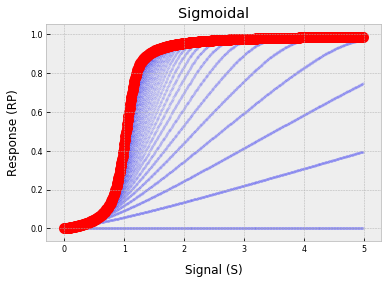

In [4]:
fig, ax, data, last_data = h.plot_multiple_concentration("S", concentration_interval, time_interval, 
                            speciesX="S", speciesY="RP", dim3=False, 
                            x_label="Signal (S)", y_label="Response (RP)", save=True)

In [5]:
data_x = last_data['x']
data_y = last_data['y']

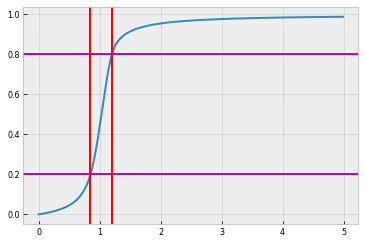

In [6]:
plt.plot(data_x,data_y)
plt.axvline(0.85,color='r')
plt.axvline(1.21,color='r')
plt.axhline(0.2, color='m')
plt.axhline(0.8, color='m')

# Logic

I tried to run very simple propositions however even the one below seems not computable. I tried different values for the integration scheme and the estimation parameter, all without success.

In [7]:
P1 = Atomic(var("RP") < 2)

In [8]:
P1.signal_for_system(sys_s, 1, precondition=1,
    estimation=1e-3,
    integrationScheme=3,
    cutoff_threshold=1e-5).plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[1.0000000000000000 .. 1.0000000000000000]', '[1.0000000000000000 .. 1.0000000000000000]']
ode in symbolic ring
str_odes = ['(x0 + [0.0499999999999999, 0.0500000000000001]*x1*x2 + x0*x2 + [0.0499999999999999, 0.0500000000000001]*[-1.00000000000000, -1.00000000000000])/(x0 + [0.0499999999999999, 0.0500000000000001]*x2 + [0.0499999999999999, 0.0500000000000001])', '[0.000000000000000, 0.000000000000000]', '(-(x0 + [0.0499999999999999, 0.0500000000000001]*x1*x2 + x0*x2 + [0.0499999999999999, 0.0500000000000001]*[-1.00000000000000, -1.00000000000000]))/(x0 + [0.0499999999999999, 0.0500000000000001]*x2 + [0.0499999999999999, 0.0500000000000001])']
crude_roots = False
run = True
_handle_initials called!
vars = ['x0', 'x1', 'x2']
C = [0.0..0.0]
C = [1.0..1.0]
C = [1.0..1.0]
run within string args
integrationScheme = 4
Running Flow*: 1 items in 5.70 seconds


FlowstarFailedException: Did not run successfully!
status = 4
num_flowpipes = 23

In the following the kernel dies

In [ ]:
P1.context_signal_for_system(sys_s, 20, precondition=1,
    estimation=1e-3,
    integrationScheme=3,
    cutoff_threshold=1e-5).refined_signal(0)

## Context signal
I tried all of the propositions below, however the kernel died in every single case.

In [ ]:
P = Atomic(var("RP") < 2)
P = G(1, Atomic(var("RP") < 2))
P = G(RIF(0,1), Atomic(var("RP") < 2))
P = F(RIF(0,1), Atomic(var("RP") < 2))
P = G(10, F(RIF(0,1), Atomic(var("RP") < 2)))
P = G(1, F(RIF(0,0.1), Atomic(var("RP") < 0.2)))

In [ ]:
csig = P.context_signal_for_system(sys_s, 10, precondition=1,
    estimation=1e-3,
    integrationScheme=3,
    cutoff_threshold=1e-5,
    use_masks=True,
    symbolic_composition=True)